In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Load University data

In [3]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_rpp.pickle')

In [4]:
university_df[:3]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup,RPP_all
0,1.0,Harvard University,USA,1.0,1,1,1,1,100.0,166027.0,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25.0,1.0,Lawrence S. Bacow,President,6174951000,42103580.0,082359691|149617367|047006379,215500.0,1.0,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,5.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2505.0,-71.118313,42.374471,96.0,1.0,-71.118313,"Boston-Cambridge-Newton, MA-NH",False,115.5
1,2.0,Massachusetts Institute of Technology,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",False,115.5
2,3.0,Stanford University,USA,3.0,10,4,3,2,95.1,243744.0,Stanford University,,,Stanford,CA,94305,6.0,8.0,Marc Tessier-Lavigne,President,6507232300,941156365.0,009214214,130500.0,1.0,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,21.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,41940,1,488,-2.0,6085,Santa Clara County,618.0,-122.167359,37.429434,96.0,1.0,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",False,126.7


### Load postdoc salary data

In [5]:
salary_df = pd.read_pickle(DATA_DIR / 'postdoc_salary_df_inflation_adjusted.pickle')

In [6]:
len(salary_df)

34804

In [7]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY
48938,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.5,71683.249058
49510,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-06-18 09:09:18,2019-08-01 00:00:00,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,TEMPLE UNIVERSITY,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19122,60000.0,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-06-18 09:09:18,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.0,62352.688787
77188,POSTDOCTORAL RESEARCH ASSOCIATE,"COMPUTER PROGRAMMERS, R&D",Y,2019-03-15 09:05:46,2019-06-01 00:00:00,RENSSELAER POLYTECHNIC INSTITUTE,NaN,TROY,NY,12180,UNITED STATES OF AMERICA,Troy,Rensselaer,NEW YORK,12180,50000.0,NaN,Year,46883.0,Year,Level I,PLACE OF BUSINESS,2019-03-15 09:05:46,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50000.0,51960.573989


##### Count number of postdocs in each major employer

In [8]:
n_postdocs = pd.DataFrame(np.unique(salary_df.EMPLOYER_NAME.values, return_counts=True)).T
n_postdocs.columns = ['EMPLOYER', "COUNT"]
n_postdocs = n_postdocs.sort_values(by='COUNT', ascending=False)
# cutoff at least 10 postdocs 
n_postdocs = n_postdocs[n_postdocs.COUNT > 10]
n_postdocs[:100]

,EMPLOYER,COUNT
834,UNIVERSITY OF MICHIGAN,1141
890,"UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY)",731
394,NORTHWESTERN UNIVERSITY,623
319,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,616
803,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",590
...,...,...
799,"UNIVERSITY OF CALIFORNIA, IRVINE",95
495,SANFORD BURNHAM PREBYS MEDICAL DISCOVERY INSTI...,92
656,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,90
239,INDIANA UNIVERSITY,88


In [9]:
# number of employers
len(n_postdocs)

340

### Match university on ranking list to employer name in H1B data

In [10]:
def strip_name(name):
    return ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', name.lower()))

In [11]:
university_df[['Institution', 'INSTNM', 'IALIAS']][:4]

,Institution,INSTNM,IALIAS
0,Harvard University,Harvard University,
1,Massachusetts Institute of Technology,Massachusetts Institute of Technology,"MIT, M.I.T."
2,Stanford University,Stanford University,
3,Princeton University,Princeton University,


In [12]:
institution_lower = np.array([strip_name(i) if type(i) == str else np.nan for i in university_df.Institution.values])

In [13]:
hand_matched = {
    "theuniversityofalabama": "universityofalabamatuscaloosa",
    "theunivofalabamaatbirmingham":"universityofalabamaatbirmingham",
    #"thepennsylvaniastateuniversity": "pennsylvaniastateuniversityuniversitypark",
    "universityofcaliforniaatsantabarbara": "universityofcaliforniasantabarbara",
    'theboardoftrusteesofthelelandstanfordjruniversity': 'stanforduniversity',
    "thelelandstanfordjruniversity": 'stanforduniversity',
    "utsouthwesternmedicalcenter":"universityoftexassouthwesternmedicalcenter",
    "uchicagoargonnellc":"universityofchicago", 
    "virginiapolytechnicinstitutestateuniversity":"virginiatech",
    "researchfoundationofsunyatbuffalo": "universityatbuffalo",
    "stateuniversityofnewyorkatbuffalo": "universityatbuffalo",
    #"louisianastateuniversityandamcollege": "louisianastateuniversitybatonrouge",
    "indianaunivpurdueunivindianapolis":"indianauniversitypurdueuniversityindianapolis",
    "mountsinaimedicalcenter":"icahnschoolofmedicineatmountsinai",
    "theadministratorsofthetulaneeducationalfund":"tulaneuniversity",
    "tuftsmedicalcenter": "tuftsuniversity",
    "stateuniversityofnewyorkatstonybrook":"stonybrookuniversity",
    "nyugrossmanschoolofmedicine":"newyorkuniversity",
    #"texastechuniversityhealthsciencescenter":"texastechuniversityttu",
    "universityofnorthtexasdenton": "universityofnorthtexashealthsciencecenter",
    "researchcorporationoftheuniversityofhawaii":"universityofhawaiiatmanoa",
    "boardofregentsoftheuniversityofnebraska":"universityofnebraskalincoln",
    "thecuratorsoftheuniversityofmissouri":"universityofmissouricolumbia",
    #"theuniversityofmississippi": "universityofmississippimedicalcenter",
    "theunivofalaatbirminghamuab": "universityofalabamaatbirmingham",
    "texasamengineeringexperimentstationpartoftamusengineeringpr":"texasamuniversitycollegestation",
    "texasamagriliferesearchpartoftamusagriculturalprg": "texasamuniversitycollegestation",
    "texasamengineeringexperimentstation": "texasamuniversitycollegestation",
    #"texasamuniversityhealthsciencecenter":"texasamhealthsciencecenter",
    "texasaampmengineeringexperimentstationpartoftamusengineeringpr": "texasamuniversitycollegestation",
    "texasamagriliferesearch": "texasamuniversitycollegestation",
    "texasamengineeringexperimentstation": "texasamuniversitycollegestation",
    "texasaampmagriliferesearchpartoftamusagriculturalprg": "texasamuniversitycollegestation",
    #"texasaampmuniversityhealthsciencecenter": "texasamhealthsciencecenter",
    "rutgersthestateuniversityofnewjersey":"rutgersuniversitynewbrunswick",
}

In [14]:
hand_matched_INSTNM = {
    "weillcornellmedicalcollege": "Weill Medical College of Cornell University",
    "theuniversityoftennesseehealthsciencecenter": "The University of Tennessee Health Science Center",
    "borusgaoboaugustauniversity": "Augusta University",
    "researchfoundationofthestateuniversityofnewyork": "Stony Brook University",
    "sanfordburnhamprebysmedicaldiscoveryinstitute": "Sanford Burnham Prebys Medical Discovery Institute",
    "sanfordburnhammedicalresearchinstitute": "Sanford Burnham Prebys Medical Discovery Institute",
    "weillcornellmedicalcollege": "Weill Medical College of Cornell University",
    "universityofnorthtexashealthsciencecenter": "University of North Texas",
    "lsuagriculturalcenter": "Louisiana State University and Agricultural & Mechanical College",
    "boisestateuniversity": "Boise State University",
    "rosalindfranklinuniversityofmedicineampscience": "Rosalind Franklin University of Medicine and Science",
    "californiastateuniversitynorthridge": "California State University-Northridge",
    "texasstateuniversity": "Texas State University",
    "northeastohiomedicaluniversity": "Northeast Ohio Medical University",
    "theuniversityoftennesseehealthsciencecenter": "The University of Tennessee Health Science Center",
    "marshalluniversityresearchcorporation": "Marshall University",
    "northcarolinaagricultureandtechnicalstateuniversity": "North Carolina A & T State University",
    "borusgaoboaugustauniversity": "Augusta University",
    "meharrymedicalcollege": "Meharry Medical College",
    "researchfoundationforthestateuniversityofnewyork": "Stony Brook University",
}

In [15]:
#[i for i in institution_lower if 'texas' in i] 

In [16]:
n_matches = []
for idx, row in tqdm(n_postdocs.iterrows(), total=len(n_postdocs)):
    employer = strip_name(row.EMPLOYER)
    
    if employer in hand_matched.keys():
        match = np.where(institution_lower == hand_matched[employer])[0]
        n_matches.append(match[0])
        continue
        
    match = np.where(institution_lower == employer)[0]
    if len(match) >0:
        n_matches.append(match[0])
        continue
    
    # try matching by subset of name
    match = np.where([employer in i for i in institution_lower])[0]
    if len(match) >0:
        n_matches.append(match[0])
        continue
    match = np.where([i in employer for i in institution_lower])[0]
    if len(match) >0:
        n_matches.append(match[0])
        continue
    
    if employer in hand_matched_INSTNM.keys():
        match = np.where(university_df.INSTNM.values == hand_matched_INSTNM[employer])[0]
        n_matches.append(match[0])
        continue
    
    print('Not matched: ', employer, row.EMPLOYER, row.COUNT)
    #print('"{}":"",'.format(employer))
    
    
    n_matches.append(np.nan)
    #break

  0%|          | 0/340 [00:00<?, ?it/s]

Not matched:  utbattellellcoakridgenationallaboratory UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY) 731
Not matched:  stjudechildrensresearchhospital ST. JUDE CHILDREN'S RESEARCH HOSPITAL 400
Not matched:  losalamosnationalsecurityllc LOS ALAMOS NATIONAL SECURITY, LLC 191
Not matched:  memorialsloanketteringcancercenter MEMORIAL SLOAN-KETTERING CANCER CENTER 149
Not matched:  theallianceforsustainableenergyllc THE ALLIANCE FOR SUSTAINABLE ENERGY LLC 141
Not matched:  oakridgeassociateduniversities OAK RIDGE ASSOCIATED UNIVERSITIES 124
Not matched:  triadnationalsecurityllc TRIAD NATIONAL SECURITY, LLC 112
Not matched:  lawrencelivermorenationalsecurityllc LAWRENCE LIVERMORE NATIONAL SECURITY, LLC 111
Not matched:  thechildrenshospitalofphiladelphia THE CHILDREN'S HOSPITAL OF PHILADELPHIA 107
Not matched:  themethodisthospitalresearchinstitute THE METHODIST HOSPITAL RESEARCH INSTITUTE 103
Not matched:  beckmanresearchinstituteofthecityofhope BECKMAN RESEARCH INSTITUTE OF THE CITY OF 

In [17]:
for match, (idx, row) in zip(n_matches, n_postdocs.iterrows()):
    if np.isnan(match):
        continue
    salary_df.loc[salary_df.EMPLOYER_NAME == row.EMPLOYER, "INSTNM"] = university_df.INSTNM.values[match]
    salary_df.loc[salary_df.EMPLOYER_NAME == row.EMPLOYER, "institution"] = university_df.Institution.values[match]

In [18]:
salary_df.to_pickle(DATA_DIR/ 'postdoc_salary_df_inflation_adjusted_ranking.pickle')

In [19]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,INSTNM,institution
48938,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.5,71683.249058,University of Pennsylvania,University of Pennsylvania
49510,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-06-18 09:09:18,2019-08-01 00:00:00,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,TEMPLE UNIVERSITY,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19122,60000.0,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-06-18 09:09:18,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.0,62352.688787,Temple University,Temple University
77188,POSTDOCTORAL RESEARCH ASSOCIATE,"COMPUTER PROGRAMMERS, R&D",Y,2019-03-15 09:05:46,2019-06-01 00:00:00,RENSSELAER POLYTECHNIC INSTITUTE,NaN,TROY,NY,12180,UNITED STATES OF AMERICA,Troy,Rensselaer,NEW YORK,12180,50000.0,NaN,Year,46883.0,Year,Level I,PLACE OF BUSINESS,2019-03-15 09:05:46,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50000.0,51960.573989,Rensselaer Polytechnic Institute,Rensselaer Polytechnic Institute


In [20]:
len(salary_df)

34804

### disclude salaries not associated with a university

In [21]:
salary_df = salary_df[salary_df.INSTNM.isnull() == False]

In [22]:
len(salary_df)

28217

### Disclude salaries  outside of normal range

In [23]:
salary_df.sort_values(by="INFLATION_SCALED_BASE_SALARY", ascending=False)[:10]
salary_df = salary_df[
    (salary_df.INFLATION_SCALED_BASE_SALARY > 30000) &
    (salary_df.INFLATION_SCALED_BASE_SALARY < 100000)
]
len(salary_df)

27572

In [37]:
28217 - 27572

645

(array([3.000e+00, 4.000e+00, 4.000e+01, 1.680e+02, 5.550e+02, 1.421e+03,
        3.076e+03, 7.193e+03, 4.952e+03, 3.319e+03, 2.347e+03, 1.665e+03,
        8.980e+02, 5.610e+02, 3.490e+02, 3.920e+02, 1.670e+02, 1.500e+02,
        1.240e+02, 5.100e+01, 5.400e+01, 3.600e+01, 1.500e+01, 1.200e+01,
        2.000e+01]),
 array([30220.37850813, 33010.03757312, 35799.69663811, 38589.3557031 ,
        41379.01476809, 44168.67383308, 46958.33289807, 49747.99196306,
        52537.65102805, 55327.31009304, 58116.96915803, 60906.62822302,
        63696.28728801, 66485.946353  , 69275.60541799, 72065.26448298,
        74854.92354797, 77644.58261296, 80434.24167795, 83223.90074294,
        86013.55980793, 88803.21887292, 91592.87793791, 94382.5370029 ,
        97172.19606789, 99961.85513288]),
 <a list of 25 Patch objects>)

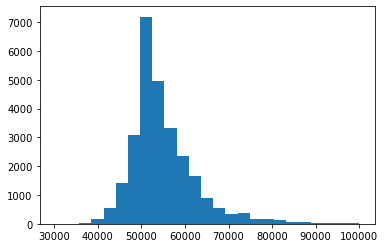

In [24]:
plt.hist(salary_df.INFLATION_SCALED_BASE_SALARY.values, bins=25)

In [25]:
overall_median_salary = np.median(salary_df.INFLATION_SCALED_BASE_SALARY)
overall_median_salary

53100.08961257449

### Get university median salary

In [26]:
def bootstrap_ci(x, ci=95, func = np.median, n_samples = 1000):
    vals = [func(np.random.choice(x, len(x), replace=True)) for i in range(n_samples)]
    bounds_0 = (100-ci)/2
    bounds_1 = 100 - bounds_0
    lower, upper = np.percentile(vals, (bounds_0, bounds_1))
    return lower, upper

In [27]:
median_salary = []
n_salaries = []
salary_upper = []
salary_lower = []
for idx, row in tqdm(university_df.iterrows(), total=len(university_df)):
    salary_values = salary_df[salary_df.INSTNM == row.INSTNM].INFLATION_SCALED_BASE_SALARY.values
    salary_bounds = bootstrap_ci(salary_values)
    salary_upper.append(salary_bounds[1])
    salary_lower.append(salary_bounds[0])
    med_sal = np.median(salary_values)
    if np.isnan(med_sal):
        median_salary.append(np.nan)
        n_salaries.append(0)
        if pd.isnull(row.Institution)  == False:
            print("No postdoc data: {}".format( row.INSTNM))
        continue
    median_salary.append(med_sal)
    n_salaries.append(len(salary_values))
median_salary = np.array(median_salary)
n_salaries = np.array(n_salaries)

  0%|          | 0/6441 [00:00<?, ?it/s]

/home/AD/tsainbur/anaconda3/envs/postdoc/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/AD/tsainbur/anaconda3/envs/postdoc/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No postdoc data: University of Wisconsin-Madison
No postdoc data: Dartmouth College
No postdoc data: Ohio State University-Main Campus
No postdoc data: University of Virginia-Main Campus
No postdoc data: University of Florida
No postdoc data: Michigan State University
No postdoc data: University of Colorado Denver/Anschutz Medical Campus
No postdoc data: Yeshiva University
No postdoc data: University of Miami
No postdoc data: Wake Forest University
No postdoc data: University of California-Riverside
No postdoc data: The University of Tennessee-Knoxville
No postdoc data: University of New Mexico-Main Campus
No postdoc data: CUNY City College
No postdoc data: Albert Einstein College of Medicine
No postdoc data: The University of Texas at Dallas
No postdoc data: Amherst College
No postdoc data: Kansas State University
No postdoc data: University of Central Florida
No postdoc data: Oklahoma State University-Main Campus
No postdoc data: West Virginia University
No postdoc data: University o

In [28]:
university_df["MEDIAN_SALARY"] = median_salary
university_df["N_SALARIES"] = n_salaries
university_df["MEDIAN_SALARY_UPPER"] = salary_upper
university_df["MEDIAN_SALARY_LOWER"] = salary_lower

In [29]:
# Median salary scaled to RPP
university_df["REAL_MEDIAN_SALARY"] = median_salary / (university_df["RPP_all"].values / 100)

In [30]:
university_df["REAL_MEDIAN_SALARY_UPPER"] = university_df["MEDIAN_SALARY_UPPER"] / (university_df["RPP_all"].values / 100)
university_df["REAL_MEDIAN_SALARY_LOWER"] = university_df["MEDIAN_SALARY_LOWER"] / (university_df["RPP_all"].values / 100)

In [31]:
university_df.to_pickle(DATA_DIR/ 'university_ranking_salary.pickle')

In [32]:
median_salary_across_universities = np.nanmedian(median_salary)
median_salary_across_universities

52031.24036994661

In [33]:
university_df.N_SALARIES.sum()

27572

In [34]:
"""university_df[np.array(
    [
        True if 'virginia' in row.INSTNM.lower() else False for idx, row in university_df.iterrows()
    ]
)]"""

"university_df[np.array(\n    [\n        True if 'virginia' in row.INSTNM.lower() else False for idx, row in university_df.iterrows()\n    ]\n)]"

##### testing

In [35]:
university_df[university_df.INSTNM == 'Rutgers University-New Brunswick']

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup,RPP_all,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
31,50.0,Rutgers University–New Brunswick,USA,29.0,189,115,24,87,84.6,186380.0,Rutgers University-New Brunswick,"Rutgers, The State University of New Jersey|Ru...",83 Somerset St,New Brunswick,NJ,08901-1281,34.0,2.0,Jonathan Holloway,President,8484454636,226001086.0,001912864,262900.0,1.0,https://newbrunswick.rutgers.edu/,https://www.rutgers.edu/admissions,https://financialaid.rutgers.edu/,https://admissions.rutgers.edu/apply-rutgers,https://financialaid.rutgers.edu/tools-and-res...,https://veterans.rutgers.edu/,oirap.rutgers.edu/Disclosures.html,https://ods.rutgers.edu/,1.0,1.0,1.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,13.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,14.0,15.0,4.0,16.0,15.0,15.0,15.0,1.0,5.0,2.0,-2,-2.0,35620,1,408,-2.0,34023,Middlesex County,3406.0,-74.446251,40.498769,93.0,1.0,-74.446251,"New York-Newark-Jersey City, NY-NJ-PA",False,125.7,52199.143215,127,53066.295004,50789.191106,41526.76469,42216.622915,40405.084412


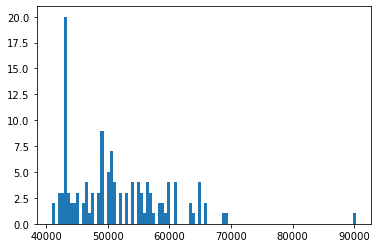

In [36]:
plt.hist(salary_df[salary_df.INSTNM == "Rutgers University-New Brunswick"].INFLACTION_SCALED_BASE_SALARY.values, bins=100);